# Getting Data from Report and Cube 

## Create connection

In [1]:
from mstrio.connection import Connection
import matplotlib

In [14]:
PROJECT_NAME = "MicroStrategy Tutorial"
BASE_URL = "https://demo.microstrategy.com/MicroStrategyLibrary/api"  # Insert URL for your env here
# PROJECT_ID = "B7CA92F04B9FAE8D941C3E9B7E0CD754"  # Insert you project ID here
PROJECT_ID = "A336F99511EA9FF2D05E0080EFC55CB0"
# REPORT_ID = "E659E86811E58C918D6F0080EF453539"
REPORT_ID = "ADAFC94F41480D3C66974688D02BB378"
CUBE_ID = "D069415811EB88D901970080EF9558F2"

In [15]:
conn = Connection(BASE_URL, project_id=PROJECT_ID, login_mode=8)

Connection to MicroStrategy Intelligence Server has been established.


## Cube

In [8]:
from mstrio.project_objects import OlapCube, Report

In [9]:
my_cube = OlapCube(connection=conn, id=CUBE_ID)
my_cube

OlapCube object named: 'Profit and Revenue' with ID: 'D069415811EB88D901970080EF9558F2'


OlapCube(connection, id='D069415811EB88D901970080EF9558F2', name='Profit and Revenue')

In [10]:
my_cube_df = my_cube.to_dataframe()
my_cube_df

Initializing an instance of a cube. Please wait...

,Region,Call Center,Category,Subcategory,Month,Year,Revenue Forecast,Revenue % Growth YoY,Profit,Last Year's Revenue,Units Sold,Profit Forecast,Profit % Growth YoY,Last Year's Profit,Profit Margin
0,Central,Fargo,Books,Art & Architecture,,,$ 530,"58,8%",1948.0,$655,512.0,1908.0,"6,0%",1719.0,"26,01%"
1,Central,Fargo,Books,Books - Miscellaneous,,,$ 317,"93,9%",916.0,$65,697.0,889.0,"9,1%",833.0,"21,32%"
2,Central,Fargo,Books,Business,,,$ 445,"96,2%",1574.0,$97,526.0,1468.0,"94,6%",1192.0,"25,56%"
3,Central,Fargo,Books,Literature,,,$ 305,"93,0%",1054.0,$92,721.0,1023.0,"79,7%",876.0,"23,29%"
4,Central,Fargo,Books,Science & Technology,,,$ 969,"96,7%",3046.0,$845,479.0,2817.0,"88,0%",2634.0,"25,59%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,Web,Web,Music,Country,,,$ 6 972,"94,8%",476.0,$963,5155.0,405.0,"98,8%",-7.0,"5,41%"
356,Web,Web,Music,Music - Miscellaneous,,,$ 903,"98,1%",6031.0,$984,3751.0,5686.0,"92,6%",2785.0,"8,62%"
357,Web,Web,Music,Pop,,,$ 5 940,"97,6%",1832.0,$817,4902.0,1694.0,"98,9%",803.0,"6,78%"
358,Web,Web,Music,Rock,,,$ 951,"91,7%",1002.0,$900,5150.0,1013.0,"92,7%",450.0,"5,15%"


In [30]:
my_cube.metrics

[{'name': "Last Year's Profit", 'id': 'B93BCBEB11EB88D9AB830080EF25FAB6'},
 {'name': 'Profit', 'id': 'B93BD6E411EB88D9AB680080EF25FAB6'},
 {'name': 'Profit Forecast', 'id': 'B93BDF2D11EB88D9AB680080EF25FAB6'},
 {'name': 'Revenue % Growth YoY', 'id': 'FACBB63911EB88D92D0A0080EF453BB9'},
 {'name': 'Revenue Forecast', 'id': 'FCF8F72D11EB88D92D0A0080EF05BBB8'},
 {'name': 'Profit % Growth YoY', 'id': '01048E4511EB88DA2E320080EFE579B4'},
 {'name': 'Profit Margin', 'id': '043F1BCF11EB88DA2E320080EF5559B5'},
 {'name': "Last Year's Revenue", 'id': '06AFA7B611EB88DA2E320080EF6579B5'},
 {'name': 'Units Sold', 'id': '09BB7A5C11EB88DA2D0A0080EF15DBB8'}]

In [29]:
my_cube.attributes

[{'name': 'Month', 'id': 'B93BB2AF11EB88D9AB830080EF25FAB6'},
 {'name': 'Subcategory', 'id': 'B93BB8EF11EB88D9AB830080EF25FAB6'},
 {'name': 'Call Center', 'id': 'B93BBCD711EB88D9AB830080EF25FAB6'},
 {'name': 'Category', 'id': 'B93BC09611EB88D9AB830080EF25FAB6'},
 {'name': 'Region', 'id': 'B93BC44311EB88D9AB830080EF25FAB6'},
 {'name': 'Year', 'id': 'B93BC7EF11EB88D9AB830080EF25FAB6'}]

In [ ]:
my_cube.attr_elements

In [31]:
my_cube.apply_filters(attributes=["B93BC44311EB88D9AB830080EF25FAB6"], metrics=["B93BCBEB11EB88D9AB830080EF25FAB6","B93BD6E411EB88D9AB680080EF25FAB6"])

In [32]:
my_cube_df = my_cube.to_dataframe()
my_cube_df

Initializing an instance of a cube. Please wait...

,Region,Last Year's Profit,Profit
0,Central,450768.0,568021.0
1,Mid-Atlantic,399869.0,501732.0
2,Northeast,775657.0,960766.0
3,Northwest,163528.0,195863.0
4,South,484327.0,590419.0
5,Southeast,203469.0,247108.0
6,Southwest,341786.0,411343.0
7,Web,224847.0,514239.0


<AxesSubplot: >

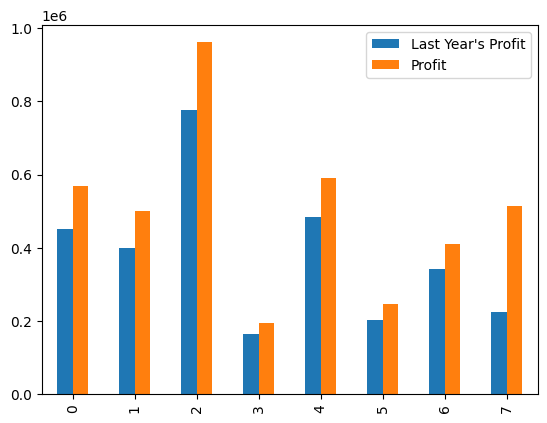

In [33]:
my_cube_df.plot(kind='bar')

## Report

In [16]:
my_report = Report(connection=conn, id=REPORT_ID, parallel=False)
my_report

Report object named: 'Sales Details' with ID: 'ADAFC94F41480D3C66974688D02BB378'


Report(connection, id='ADAFC94F41480D3C66974688D02BB378', parallel=False)

In [17]:
my_report_df = my_report.to_dataframe()
my_report_df.head()

Initializing an instance of a report. Please wait...

Downloading:   0%|          | 0/2 [00:00<?, ?it/s]

,Region,Month,Customer State,Category,Last Year's Cost,Cost,Revenue,Profit,Last Year's Revenue,Last Year's Profit
0,Northeast,Jan 2016,Connecticut,Books,1239.5890,1698.6580,2224.0,525.3420,1630.0,390.4110
1,Northeast,Jan 2016,Connecticut,Electronics,9874.8108,15367.4132,19247.0,3879.5868,12337.0,2462.1892
2,Northeast,Jan 2016,Connecticut,Movies,2384.1335,3565.9705,3920.0,354.0295,2625.0,240.8665
3,Northeast,Jan 2016,Connecticut,Music,2155.7079,3076.6230,3310.0,233.3770,2333.0,177.2921
4,Northeast,Jan 2016,Maine,Books,404.6380,155.0770,207.0,51.9230,538.0,133.3620


In [ ]:
my_report_df

In [19]:
my_report.attributes

[{'name': 'Region', 'id': '8D679D3B11D3E4981000E787EC6DE8A4'},
 {'name': 'Customer State', 'id': '54BABC8311D59D57C000B28A4CC5F24F'},
 {'name': 'Category', 'id': '8D679D3711D3E4981000E787EC6DE8A4'},
 {'name': 'Month', 'id': '8D679D4411D3E4981000E787EC6DE8A4'}]

In [20]:
my_report.metrics

[{'name': 'Cost', 'id': '7FD5B69611D5AC76C000D98A4CC5F24F'},
 {'name': "Last Year's Cost", 'id': 'CC10F9A14CA79466D5BE2AB86FF45865'},
 {'name': 'Profit', 'id': '4C051DB611D3E877C000B3B2D86C964F'},
 {'name': "Last Year's Profit", 'id': '838367154BDAFF3F783D0EB5CD82386A'},
 {'name': 'Revenue', 'id': '4C05177011D3E877C000B3B2D86C964F'},
 {'name': "Last Year's Revenue", 'id': '4C05199311D3E877C000B3B2D86C964F'}]

In [ ]:
my_report.attr_elements

In [26]:
my_report.apply_filters(attributes=["8D679D3711D3E4981000E787EC6DE8A4"], metrics=["4C051DB611D3E877C000B3B2D86C964F","4C05177011D3E877C000B3B2D86C964F"])
df = my_report.to_dataframe()

Initializing an instance of a report. Please wait...

In [27]:
df

,Category,Profit,Revenue
0,Books,242298.794,1121696.30
1,Electronics,1821870.865,10342798.05
2,Movies,108416.993,1740846.80
3,Music,76810.587,1653522.90


<AxesSubplot: >

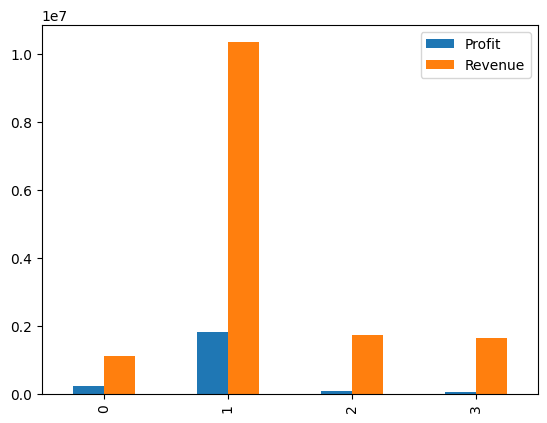

In [28]:
df.plot(kind='bar')